## Question 1

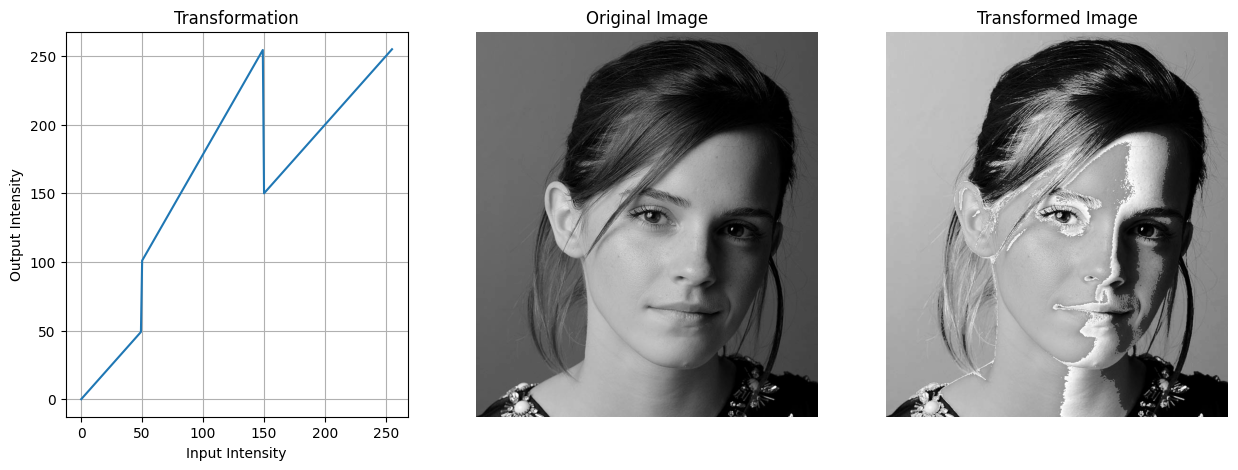

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


#  Creating the transformation function
t1 = np.arange(0, 50, 1)
t2 = np.arange(101, 256, 1.55)
t3 = np.arange(150, 256, 1)
T = np.concatenate((t1, t2, t3), axis=0)
#  Reading the image
img_original = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
#  Transforming the image
img_transformed =  cv.LUT(img_original, T)


#  Plotting the transformation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(T)
ax[0].set_title('Transformation')
ax[0].grid()
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')

#  Plotting the original image
ax[1].imshow(img_original, cmap='gray')
ax[1].set_title('Original Image')
ax[1].axis('off')

#  Plotting the transformed image
ax[2].imshow(img_transformed, cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.show()


## Question 2

(0.0, 1.0, 0.0, 1.0)

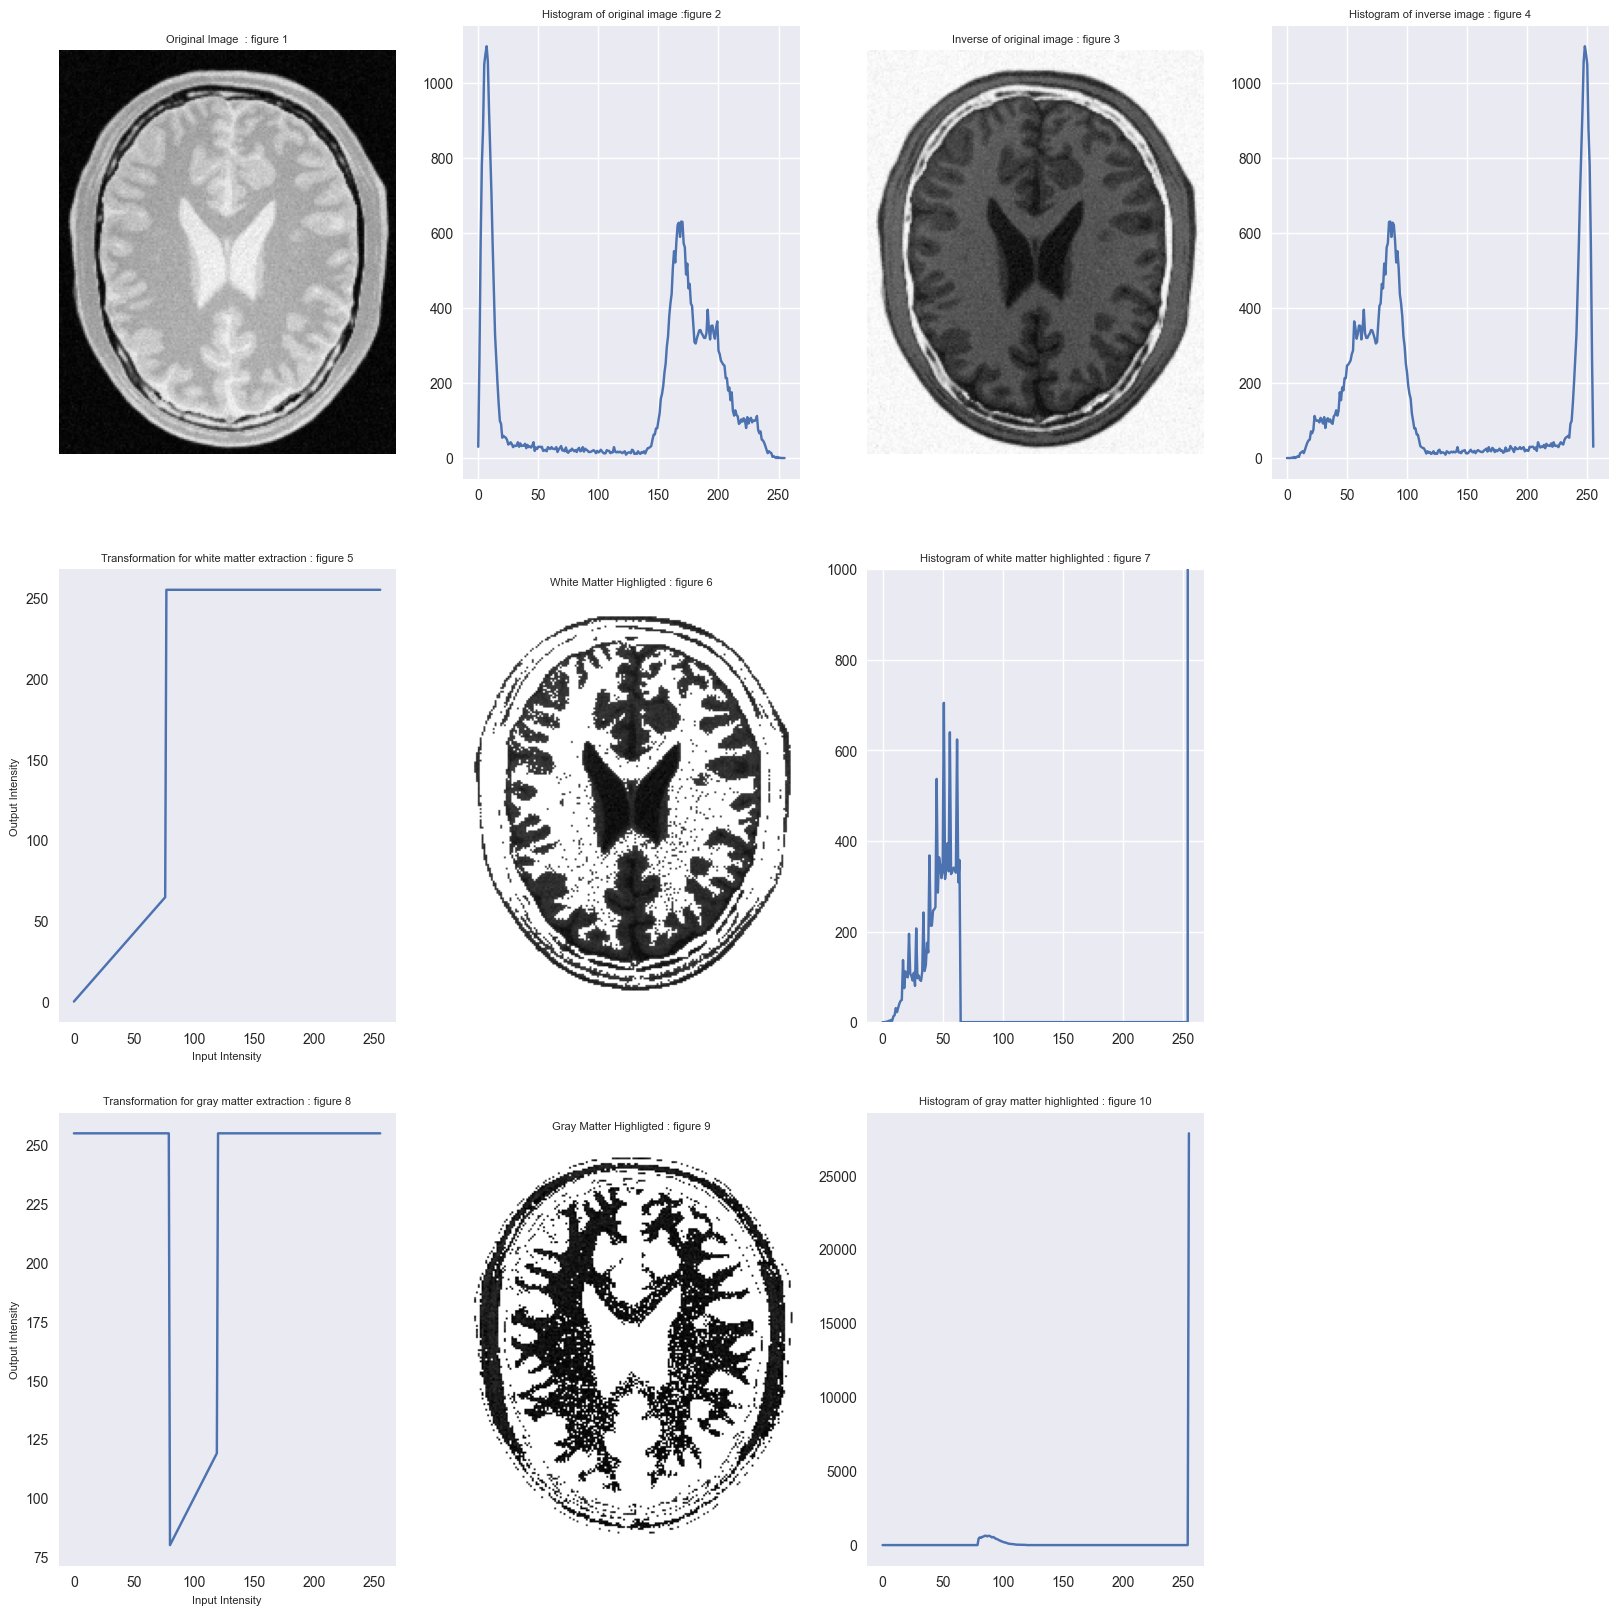

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image (replace 'brain_image.jpg' with your image filename)
img = cv2.imread('BrainProtonDensitySlice9.png', cv2.IMREAD_GRAYSCALE)

#plots
fig,ax = plt.subplots(3,4,figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].set_title('Original Image  : figure 1',fontsize=8)
ax[0,0].axis('off')

# Analyze histogram to find the best threshold_white_matter value
hist = cv2.calcHist([img],[0],None,[256],[0,256])
ax[0,1].plot(hist)
ax[0,1].set_title('Histogram of original image :figure 2',fontsize=8)

#inverse of image
img1 = 255 - img
ax[0,2].imshow(img1,cmap='gray')
ax[0,2].set_title('Inverse of original image : figure 3',fontsize=8)
ax[0,2].axis('off')

# Analyze histogram to find intensity transformation
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
ax[0,3].plot(hist)
ax[0,3].set_title('Histogram of inverse image : figure 4',fontsize=8)
#definiting a intenity transformation array to use cv.LUT
threshold_white_matter = 65
t1 = np.arange(0, threshold_white_matter, 0.85)
t2 = 255 - np.zeros(256 - len(t1))  
T = np.concatenate((t1, t2))

ax[1,0].plot(T)
ax[1,0].set_title('Transformation for white matter extraction : figure 5',fontsize=8) 
ax[1,0].grid()
ax[1,0].set_xlabel('Input Intensity',fontsize=8)
ax[1,0].set_ylabel('Output Intensity', fontsize=8)

#white matter highlighted image
img2 = cv2.LUT(img1,T).astype(np.uint8)
ax[1,1].imshow(img2,cmap='gray')
ax[1,1].set_title('White Matter Highligted : figure 6',fontsize=8) 
ax[1,1].axis('off')

# histogram of white matter highlighted image
hist = cv2.calcHist([img2],[0],None,[256],[0,256])
ax[1,2].plot(hist)
ax[1,2].set_title('Histogram of white matter highlighted : figure 7',fontsize=8)
#limit y axis to 0-1000
ax[1,2].set_ylim([0,1000])

#gray matter highlighted image
#piecewise linear transformation contains 3 parts , mid part is linear, left and right part is 255
threshold_gray_matter_start = 80
threshold_gray_matter_end = 120

t_mid = np.arange(threshold_gray_matter_start, threshold_gray_matter_end, 1)
t_left = 255-np.zeros(threshold_gray_matter_start)
t_right = 255 - np.zeros(256 - threshold_gray_matter_end)
T = np.concatenate((t_left, t_mid, t_right))

ax[2,0].plot(T)
ax[2,0].set_title('Transformation for gray matter extraction : figure 8',fontsize=8)
ax[2,0].grid()
ax[2,0].set_xlabel('Input Intensity',fontsize=8)
ax[2,0].set_ylabel('Output Intensity', fontsize=8)

img3 = cv2.LUT(img1,T).astype(np.uint8)
ax[2,1].imshow(img3,cmap='gray')
ax[2,1].set_title('Gray Matter Highligted : figure 9',fontsize=8)
ax[2,1].axis('off')

# histogram of gray matter highlighted image
hist = cv2.calcHist([img3],[0],None,[256],[0,256])
ax[2,2].plot(hist)
ax[2,2].set_title('Histogram of gray matter highlighted : figure 10',fontsize=8)
ax[2,2].grid()
ax[1,3].axis('off')
ax[2,3].axis('off')



# Question 3

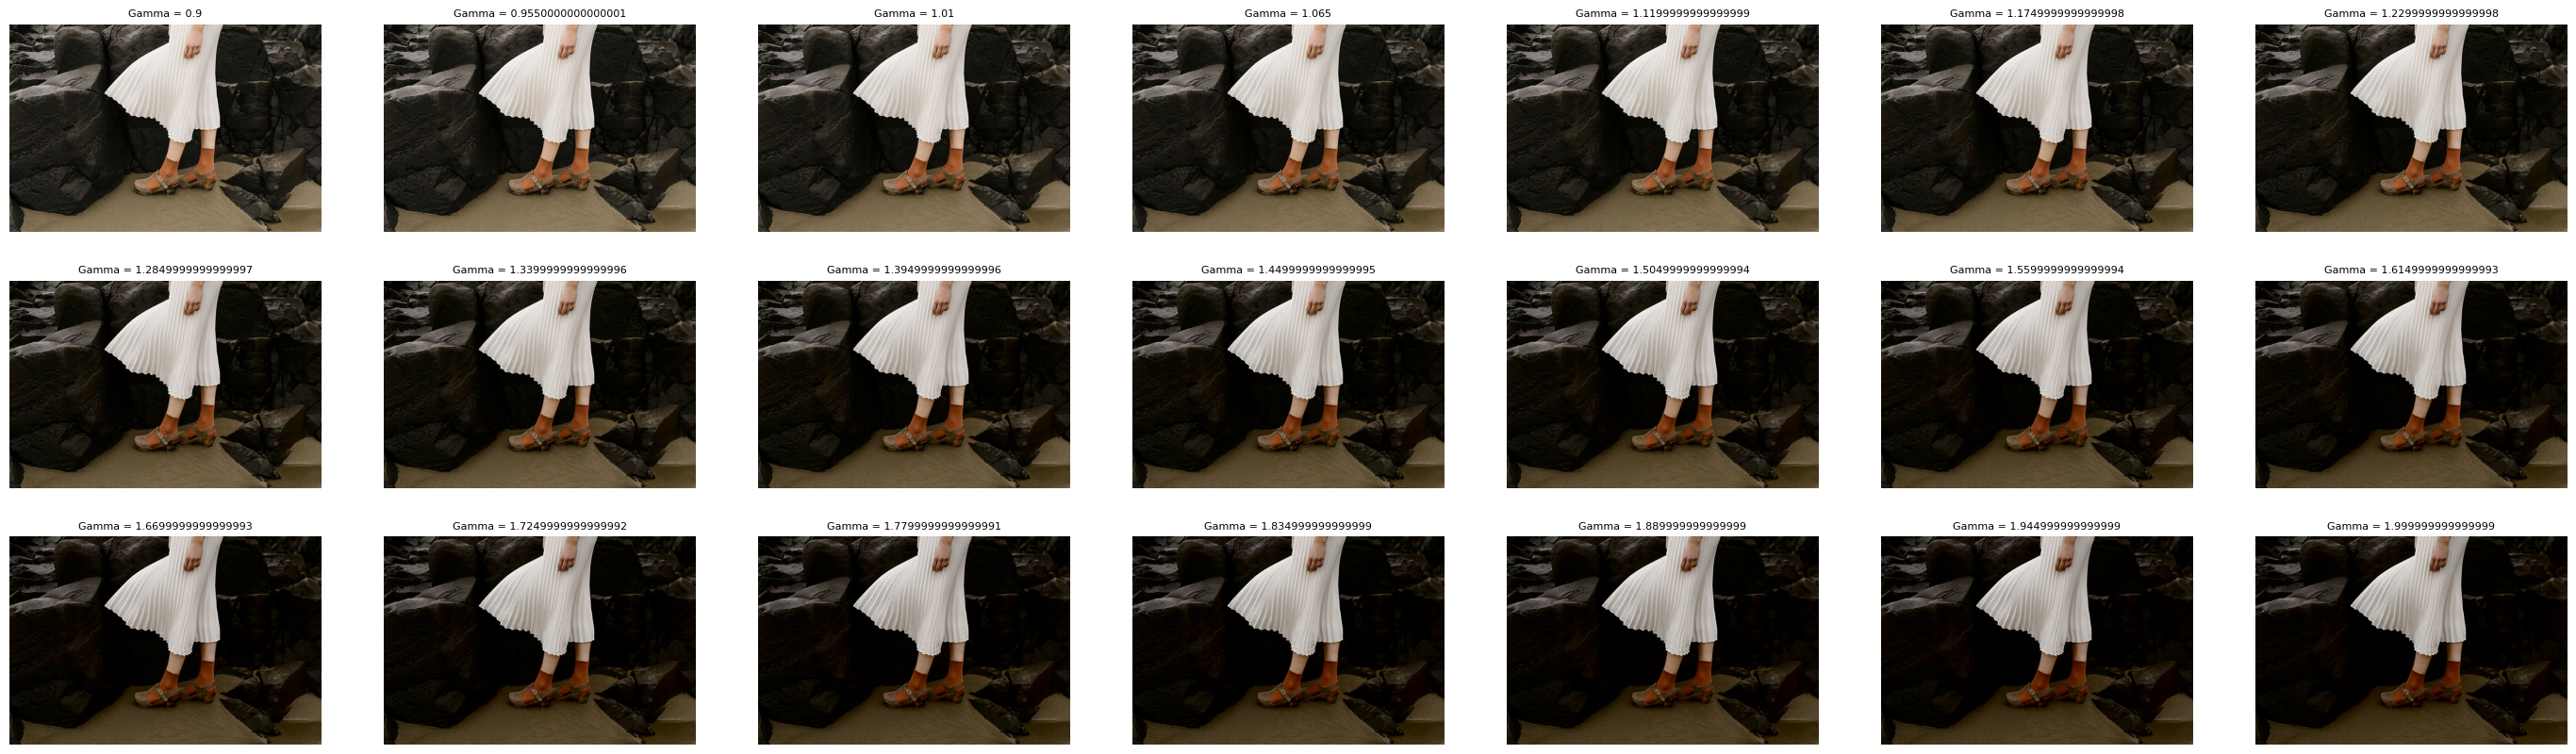

C:\Users\Dojitha Mirihagalla\AppData\Local\Temp\ipykernel_13568\3078897846.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


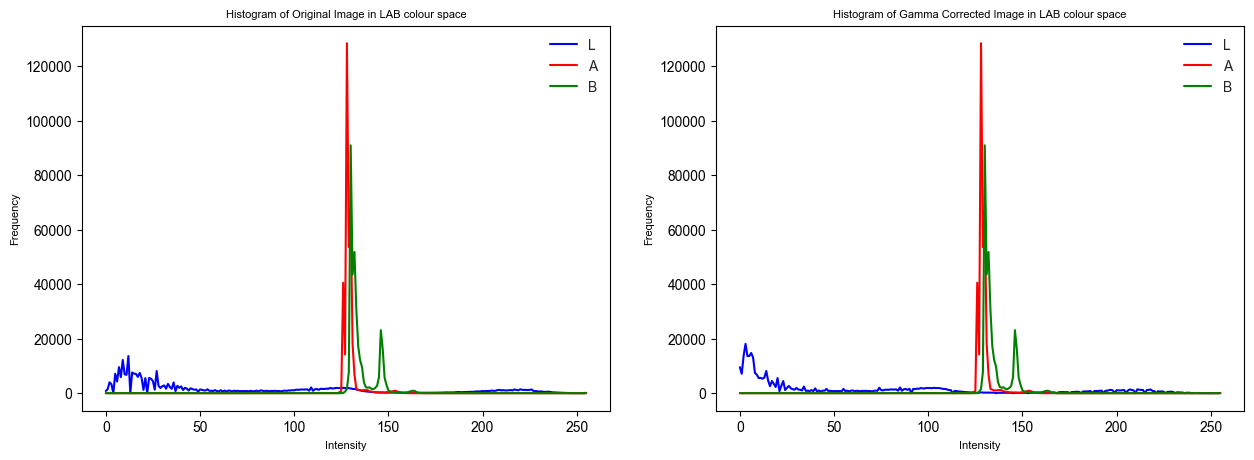

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# applying gamma correction to L plane of LAB color space

img_original = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)


# converting to LAB color space
img_Original_lab = cv.cvtColor(img_original, cv.COLOR_BGR2LAB)

# splitting the LAB image to different channels
l, a, b = cv.split(img_Original_lab)

fig, ax = plt.subplots(3, 7, figsize=(35, 10))
gamma = 0.9
for i in range(21):
    gamma_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    l_gamma_corrected = cv.LUT(l, gamma_table)
    img_gamma_corrected = cv.merge([l_gamma_corrected, a, b])
    img_corrected = cv.cvtColor(img_gamma_corrected, cv.COLOR_LAB2RGB)
    ax[i//7, i%7].imshow(img_corrected)
    ax[i//7, i%7].set_title("Gamma = " + str(gamma), fontsize=8)
    ax[i//7, i%7].axis("off")
    gamma += 0.055

plt.show()


#Histogram Plots for Original Image and Gamma Corrected Image (assuming gamma = 1.28) in LAB color space
gamma = 1.28
gamma_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
l_gamma_corrected_l = cv.LUT(l, gamma_table)
img_gamma_corrected_lab = cv.merge([l_gamma_corrected_l, a, b])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.style.use('seaborn-darkgrid')
color = ('b','r','g')
for i,col in enumerate(color):
    histr = cv.calcHist([img_Original_lab],[i],None,[256],[0,256])
    ax[0].plot(histr,color = col)
    ax[0].set_title('Histogram of Original Image in LAB colour space',fontsize=8)
    ax[0].set_xlabel('Intensity',fontsize=8)
    ax[0].set_ylabel('Frequency',fontsize=8)
    ax[0].legend(('L','A','B'))
  
    histr = cv.calcHist([img_gamma_corrected_lab],[i],None,[256],[0,256])
    ax[1].plot(histr,color = col)
    ax[1].set_title('Histogram of Gamma Corrected Image in LAB colour space',fontsize=8)
    ax[1].set_xlabel('Intensity',fontsize=8)
    ax[1].set_ylabel('Frequency',fontsize=8)
    ax[1].legend(('L','A','B'))
plt.show()


# Question 4

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#define intensity transformation function
def f(x,a,sigma=70):
    f1 = x+a*128*np.exp(-(x-128)**2*(1/(sigma**2*2)))
    return min(f1,255)


image = cv.imread('spider.png',cv.IMREAD_COLOR)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into separate channels
h, s, v = cv.split(hsv_image)

hist = cv.calcHist([s],[0],None,[256],[0,256])


# transformation
a=0.6
transformation = np.array([f(x,a) for x in range(256)]).astype(np.uint8)
s_new = cv.LUT(s,transformation)

hist = cv.calcHist([s_new],[0],None,[256],[0,256])
hsv_image_new = cv.merge([h,s_new,v])


fig,ax = plt.subplots(2,4,figsize=(20,5))
#original image
ax[0,0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')
#HSV planes
ax[0,1].imshow(h,cmap='gray')
ax[0,1].set_title('Hue')
ax[0,1].axis('off')

ax[0,2].imshow(s,cmap = 'gray')
ax[0,2].set_title('Saturation')
ax[0,2].axis('off')

ax[0,3].imshow(v,cmap = 'gray')
ax[0,3].set_title('Value')
ax[0,3].axis('off')

#transformed image
ax[1,0].imshow(cv.cvtColor(hsv_image_new, cv.COLOR_HSV2RGB))
ax[1,0].set_title('Transformed Image')
ax[1,0].axis('off')

#transformed Saturation plane
ax[1,1].imshow(s_new,cmap = 'gray')
ax[1,1].set_title('Transformed Saturation Plane')
ax[1,1].axis('off')

#Transformation function
ax[1,2].plot(transformation)
ax[1,2].set_title('Transformation Function used ')
ax[1,2].grid()
ax[1,2].set_xlabel('Input Intensity')
ax[1,2].set_ylabel('Output Intensity')

ax[1,3].axis('off')
plt.show()


# plot Various a values and transformed images to select the best value of a
fig,ax = plt.subplots(2,6,figsize=(20,5))
a=0.5
for i in range(6):
    transformation = np.array([f(x,a) for x in range(256)]).astype(np.uint8)
    s_new = cv.LUT(s,transformation)
    hsv_image_new = cv.merge([h,s_new,v])
    ax[0,i].imshow(cv.cvtColor(hsv_image_new, cv.COLOR_HSV2RGB))
    ax[0,i].set_title('a = ' + str(round(a,4)))
    ax[0,i].axis('off')
    ax[1,i].plot(transformation)
    ax[1,i].set_title('Transformation for a = ' + str(round(a,4)))
    ax[1,i].grid()
    ax[1,i].set_xlabel('Input Intensity')
    ax[1,i].set_ylabel('Output Intensity')
    a+=0.05

a=1.3

# Question 5

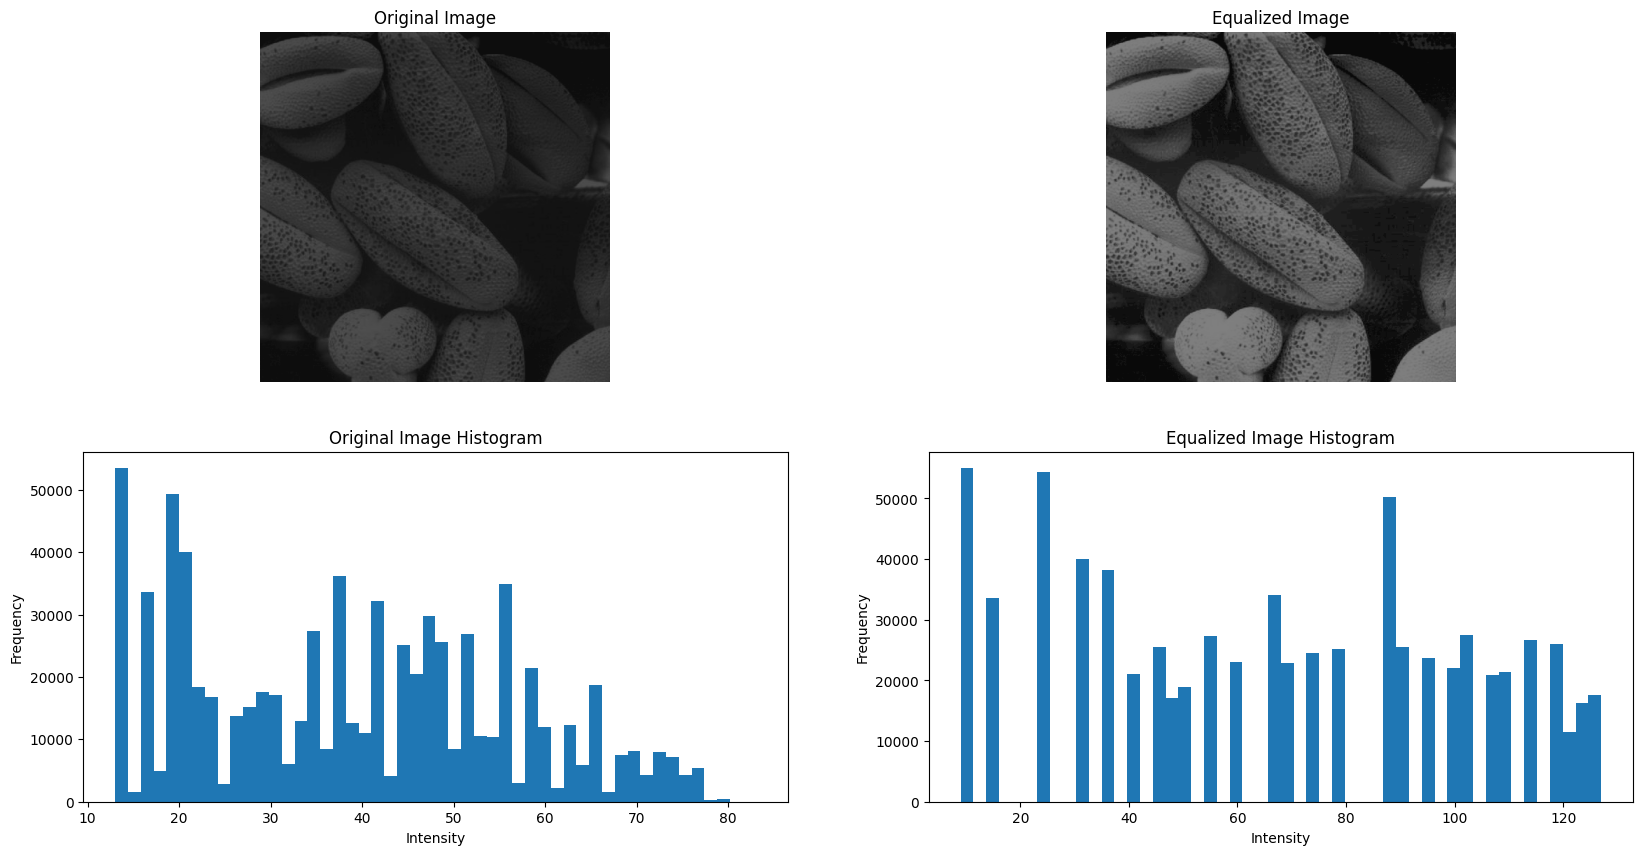

In [97]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def my_histogram_equalization(img_path, bins=2):
    img = cv.imread(img_path, cv.IMREAD_COLOR)
    img_flatten = img.flatten()

    levels = 256 // bins
    n_pixels_in_each_level = np.zeros(levels)

    for i in range(levels):
        n_pixels_in_each_level[i] = np.sum((img_flatten >= i * bins) & (img_flatten < (i + 1) * bins))

    probability_each_level = n_pixels_in_each_level / np.sum(n_pixels_in_each_level)

    cumulative_probability_each_level = np.zeros(levels)
    cumulative_probability_each_level[0] = probability_each_level[0]

    for i in range(1, levels):
        cumulative_probability_each_level[i] = cumulative_probability_each_level[i - 1] + probability_each_level[i]

    resultant_levels = np.zeros(levels)

    for i in range(levels):
        resultant_levels[i] = np.round(cumulative_probability_each_level[i] * (levels - 1))

    resultant_levels = resultant_levels.astype(np.uint8)
    img_equalized = np.zeros(img_flatten.shape)

    for i in range(levels):
        img_equalized[(img_flatten >= i * bins) & (img_flatten < (i + 1) * bins)] = resultant_levels[i]

    img_equalized = img_equalized.reshape(img.shape).astype(np.uint8)
    return img_equalized

# Example usage
input_image_path = "shells.tif"
equalized_img = my_histogram_equalization(input_image_path)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0,0].imshow(cv.cvtColor(cv.imread(input_image_path), cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Equalized Image')
ax[0,1].axis('off')

# plot Histograms
ax[1,0].hist(cv.imread(input_image_path).flatten(), bins=50)
ax[1,0].set_title('Original Image Histogram')
ax[1,0].set_xlabel('Intensity')
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(equalized_img.flatten(), bins=50)
ax[1,1].set_title('Equalized Image Histogram')
ax[1,1].set_xlabel('Intensity')
ax[1,1].set_ylabel('Frequency')

plt.show()


# Question6

(0.0, 1.0, 0.0, 1.0)

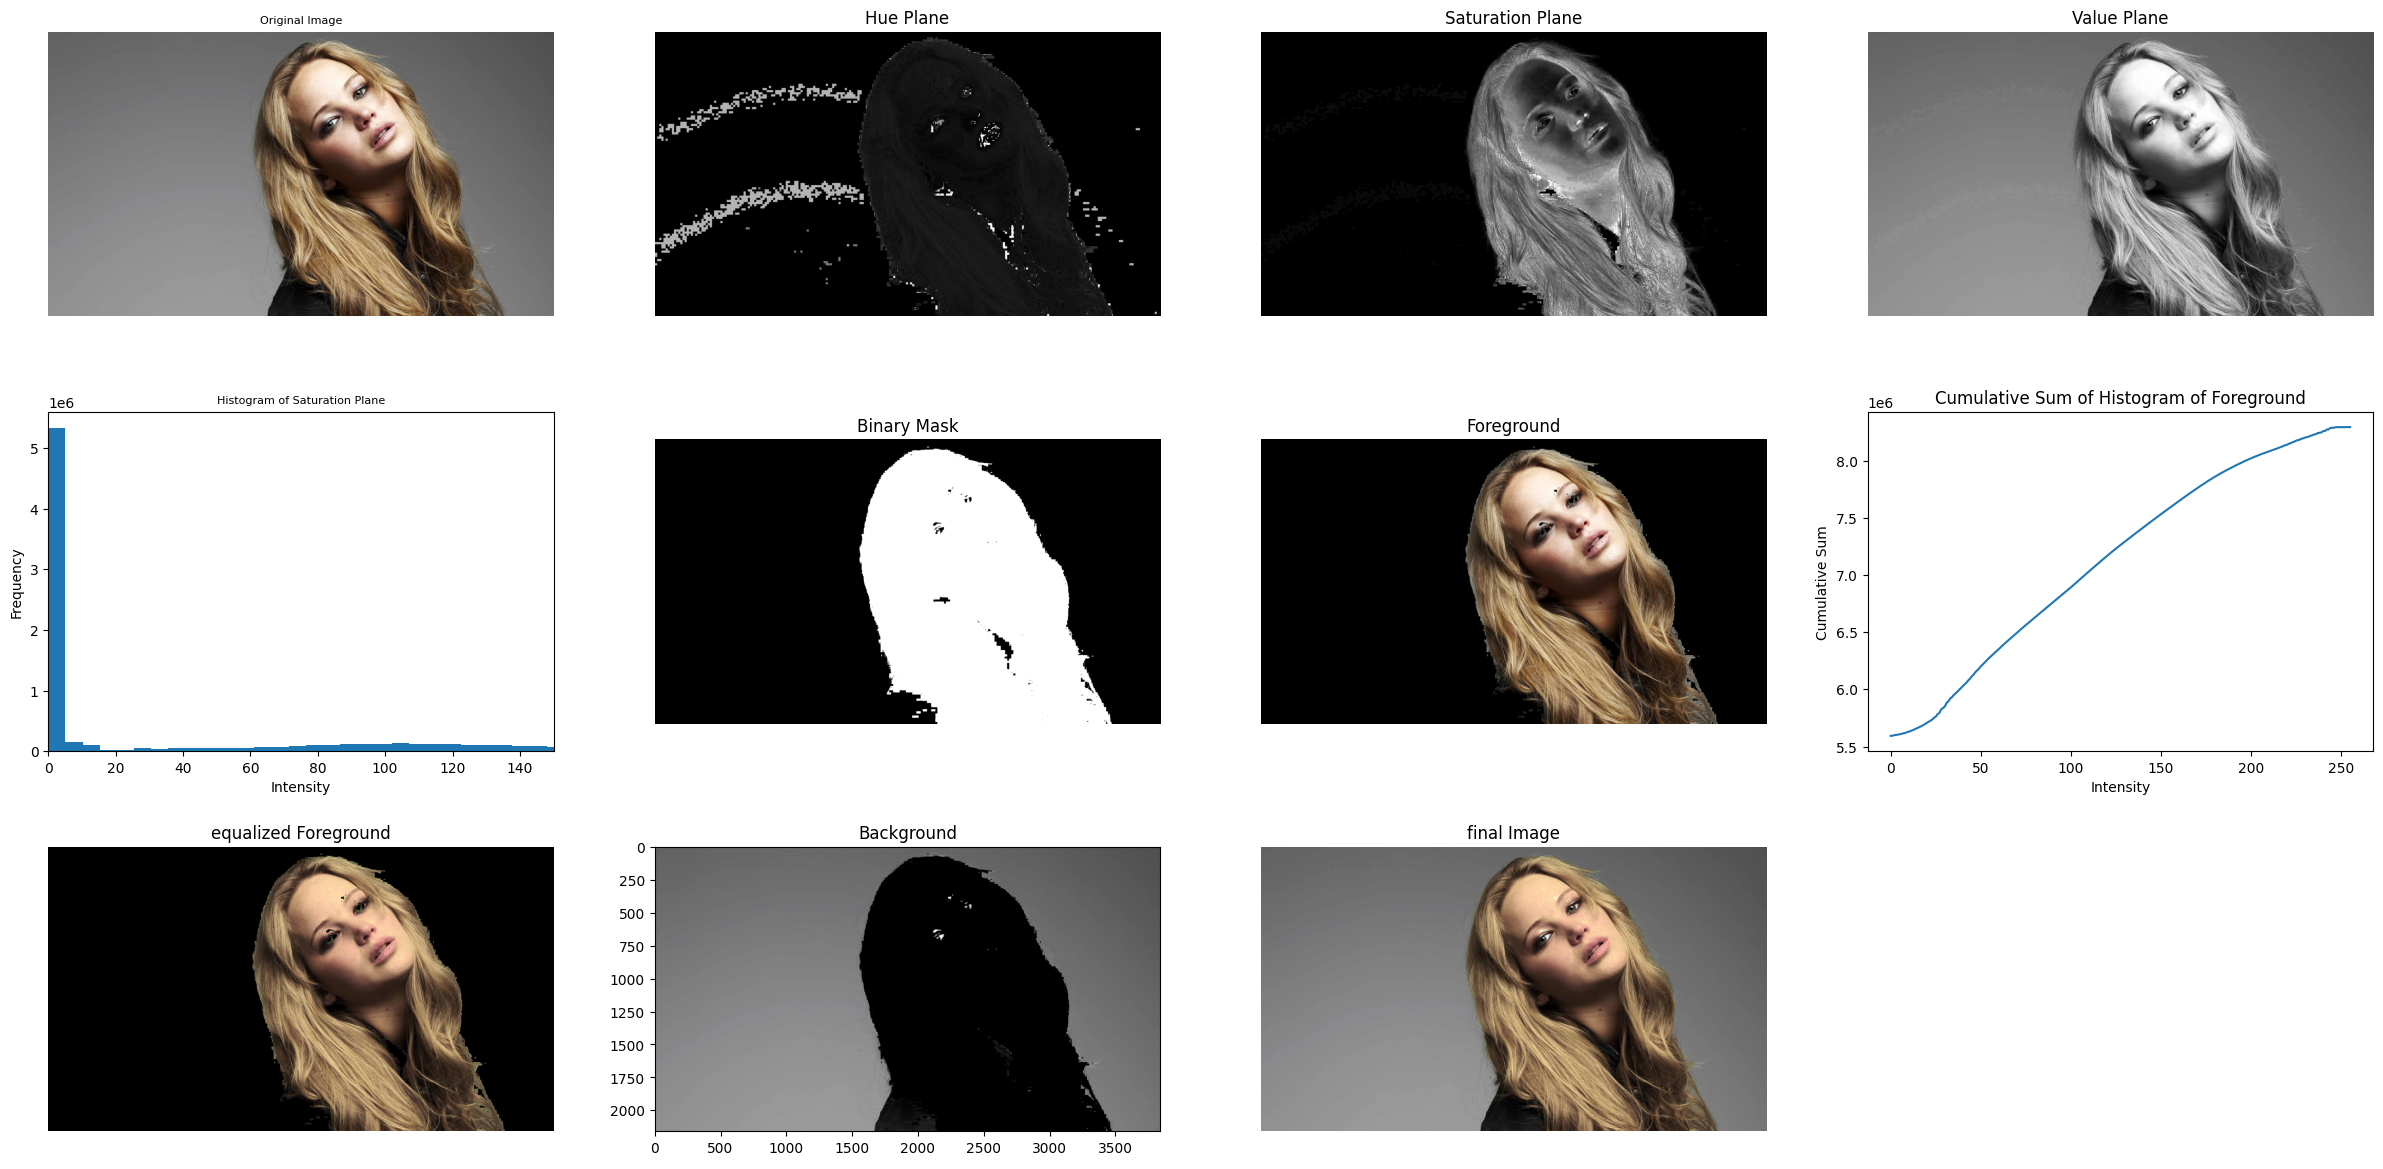

In [74]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#read the image
img = cv.imread('jeniffer.jpg',cv.IMREAD_COLOR)

#convert to HSV color space
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h,s,v = cv.split(img_hsv)

#plot the original image
fig,ax = plt.subplots(3,4,figsize=(30,15))
ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image',fontsize=8)
ax[0,0].axis('off')

#plot the hue plane
ax[0,1].imshow(h,cmap='gray')
ax[0,1].set_title('Hue Plane')
ax[0,1].axis('off')

#plot the saturation plane
ax[0,2].imshow(s,cmap='gray')
ax[0,2].set_title('Saturation Plane')
ax[0,2].axis('off')

#plot the value plane
ax[0,3].imshow(v,cmap='gray')
ax[0,3].set_title('Value Plane')
ax[0,3].axis('off')

# plot the histoygram of the saturation plane

ax[1,0].hist(s.flatten(),bins=50)
ax[1,0].set_title('Histogram of Saturation Plane',fontsize=8)
ax[1,0].set_xlabel('Intensity')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlim([0,150])


# creating binary mask using the threshold value
threshold = 15
mask = np.zeros(s.shape)
mask[s>threshold] = 255

#plot the mask
ax[1,1].imshow(mask,cmap='gray')
ax[1,1].set_title('Binary Mask')
ax[1,1].axis('off')

mask_cvt_bgr = cv.cvtColor(mask.astype(np.uint8), cv.COLOR_GRAY2BGR)
foreground = cv.bitwise_and(img,mask_cvt_bgr)

#plot the foreground
ax[1,2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1,2].set_title('Foreground')
ax[1,2].axis('off')

#cumulative sum of the histogram of the foreground
hist = cv.calcHist([cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)],[0],None,[256],[0,256])
cumulative_sum = np.cumsum(hist)

#plot the cumulative sum
ax[1,3].plot(cumulative_sum)
ax[1,3].set_title('Cumulative Sum of Histogram of Foreground')
ax[1,3].set_xlabel('Intensity')
ax[1,3].set_ylabel('Cumulative Sum')


def my_histogram_equalization(img, bins=2):
    img_flatten = img.flatten()

    levels = 256 // bins
    n_pixels_in_each_level = np.zeros(levels)

    for i in range(levels):
        n_pixels_in_each_level[i] = np.sum((img_flatten >= i * bins) & (img_flatten < (i + 1) * bins))

    probability_each_level = n_pixels_in_each_level / np.sum(n_pixels_in_each_level)

    cumulative_probability_each_level = np.zeros(levels)
    cumulative_probability_each_level[0] = probability_each_level[0]

    for i in range(1, levels):
        cumulative_probability_each_level[i] = cumulative_probability_each_level[i - 1] + probability_each_level[i]

    resultant_levels = np.zeros(levels)

    for i in range(levels):
        resultant_levels[i] = np.round(cumulative_probability_each_level[i] * (levels - 1))

    resultant_levels = resultant_levels.astype(np.uint8)
    img_equalized = np.zeros(img_flatten.shape)

    for i in range(levels):
        img_equalized[(img_flatten >= i * bins) & (img_flatten < (i + 1) * bins)] = resultant_levels[i]

    img_equalized = img_equalized.reshape(img.shape).astype(np.uint8)
    return img_equalized


## adjusting the foreground image
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
fg_h,fg_s,fg_v = cv.split(foreground_hsv)

#histogram equalization of the saturation plane
fg_s_equalized = my_histogram_equalization(fg_s,bins=2)
#merge
fg_hsv_equalized = cv.merge([fg_h,fg_s_equalized,fg_v])

#convert to BGR
fg_equalized = cv.cvtColor(fg_hsv_equalized, cv.COLOR_HSV2RGB)

#plot the foreground
ax[2,0].imshow(fg_equalized)
ax[2,0].set_title('equalized Foreground')
ax[2,0].axis('off')

#background mask invert foreground mask
bg_mask = 255 - mask

#extract the background
background = cv.bitwise_and(img,cv.cvtColor(bg_mask.astype(np.uint8), cv.COLOR_GRAY2BGR))

#plot the background
ax[2,1].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[2,1].set_title('Background')

#add the foreground and background
final_image = cv.add(cv.cvtColor(fg_equalized,cv.COLOR_RGB2BGR),background)

#plot the final image
ax[2,2].imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
ax[2,2].set_title('final Image')
ax[2,2].axis('off')

ax[2,3].axis('off')


# Question 7

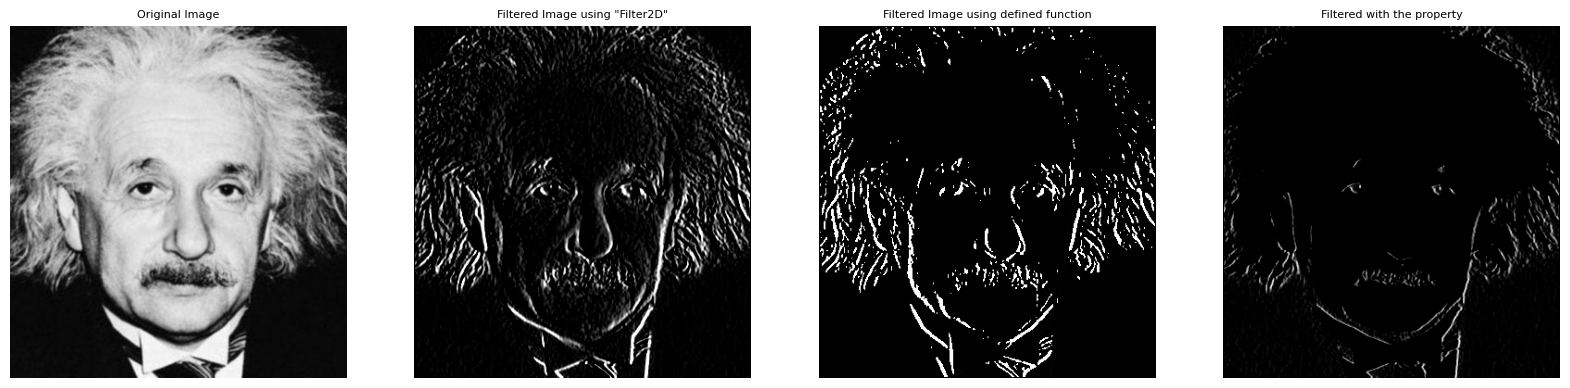

In [20]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

#read image
original_image = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)

#plot original image
fig,ax = plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(original_image,cmap='gray')
ax[0].set_title('Original Image',fontsize=8)
ax[0].axis('off')

#kernel
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float32)
#aaply kernel
filtered_image = cv.filter2D(original_image,-1,kernel)
filtered_image_rgb = cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB)
#plot filtered image
ax[1].imshow(filtered_image_rgb,cmap='gray')
ax[1].set_title('Filtered Image using "Filter2D"',fontsize=8)
ax[1].axis('off')

# ----------------------------------------------------------
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):            
            result[m, n] = np.dot(image_float[m - k_hh:m + k_hh + 1, n - k_hw:n + k_hw + 1].flatten(), kernel.flatten()) 
    return result

filtered_image_defined_func = filter(original_image, kernel)*2.5
filtered_image_defined_func= filtered_image_defined_func.astype(np.uint8)

#plot filtered image
ax[2].imshow(filtered_image_defined_func,cmap='gray')
ax[2].set_title('Filtered Image using defined function',fontsize=8)
ax[2].axis('off')

#histogram  filtered image and filtered image using defined function
np.max(filtered_image_defined_func)

kernel_1 = np.array([[1],[2],[1]],dtype=np.float32)
kernel_2 = np.array([[1,0,-1]],dtype=np.float32)

filtered_image_1 = cv.filter2D (original_image, -1 , kernel_1)
filtered_image_2 = cv.filter2D (filtered_image_1, -1 , kernel_2)

#plot
ax[3].imshow(filtered_image_2,cmap='gray')
ax[3].set_title('Filtered with the property',fontsize=8)
ax[3].axis('off')

plt.show()


# Question 8

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


def nearest_neighbor_zoom(image,scaling_factor):
    height, width , channels = image.shape

    new_height = int(height*scaling_factor)
    new_width = int (width * scaling_factor)

    new_image = np.zeros((new_height,new_width,channels),dtype=image.dtype)

    for y in range(new_height):
        for x  in range(new_width):
            u = int (x/scaling_factor)
            v = int (y/scaling_factor)
            new_image[y,x,:] = image[v,u,:]
    
    return new_image

scaling_factor = 4
for i in range(11):
    path = f'zooming\im{i+1:02}small.png'
    #print(path)
    img = cv.imread(path)
    new_image = nearest_neighbor_zoom(img,scaling_factor)
    cv.imwrite(f'zooming\zoomed\im{i+1:02}small_zoomed.png',new_image)
    print(f"image {i+1} done")

zooming\im01small.png
image 1 done
zooming\im02small.png
image 2 done
zooming\im03small.png
image 3 done
zooming\im04small.png
image 4 done
zooming\im05small.png
image 5 done
zooming\im06small.png
image 6 done
zooming\im07small.png
image 7 done
zooming\im08small.png
image 8 done
zooming\im09small.png
image 9 done
zooming\im10small.png
image 10 done
zooming\im11small.png
image 11 done


In [42]:
import math
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def zoomed_image_bilinear(image,scaling_factor):
    height, width , channels = image.shape
    new_height = int(height*scaling_factor)
    new_width = int (width * scaling_factor)

    new_image = np.zeros((new_height,new_width,channels),dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            u = x/scaling_factor
            v = y/scaling_factor

            u1,u2 = math.floor(u),math.ceil(u)
            v1,v2 = math.floor(v),math.ceil(v)

            if u2 >= width:
                u2 = width - 1
            if v2 >= height:
                v2 = height - 1
            
            A = image[v1,u1,:]
            B = image[v1,u2,:]
            C = image[v2,u1,:]
            D = image[v2,u2,:]

             # Calculate bilinearly interpolated pixel values for each channel
            for channel in range(channels):
                new_image[y, x, channel] = (
                    (u2 - u) * (v2 - v) * A[channel] +
                    (u - u1) * (v2 - v) * B[channel] +
                    (u2 - u) * (v - v1) * C[channel] +
                    (u - u1) * (v - v1) * D[channel]
                )
    
    return new_image


scaling_factor = 4
for i in range(11):
    path = f'zooming\im{i+1:02}small.png'
    #print(path)
    img = cv.imread(path)
    new_image = zoomed_image_bilinear(img,scaling_factor)
    cv.imwrite(f'zooming\zoomed_BL\im{i+1:02}small_zoomed_bilinear.png',new_image)
    print(f"image {i+1} done")
                

image 1 done
image 2 done
image 3 done
image 4 done
image 5 done
image 6 done
image 7 done
image 8 done
image 9 done
image 10 done
image 11 done


In [ ]:
def zoomed_image_bilinear(image,scaling_factor):
    height, width , channels = image.shape
    new_height = int(height*scaling_factor)
    new_width = int (width * scaling_factor)

    new_image = np.zeros((new_height,new_width,channels),dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            u = x/scaling_factor
            v = y/scaling_factor
            u1,u2 = math.floor(u),math.ceil(u)
            v1,v2 = math.floor(v),math.ceil(v)

            if u2 >= width:
                u2 = width - 1
            if v2 >= height:
                v2 = height - 1
            A = image[v1,u1,:]
            B = image[v1,u2,:]
            C = image[v2,u1,:]
            D = image[v2,u2,:]
             # Calculate bilinearly interpolated pixel values for each channel
            for channel in range(channels):
                new_image[y, x, channel] = (
                    (u2 - u) * (v2 - v) * A[channel] +
                    (u - u1) * (v2 - v) * B[channel] +
                    (u2 - u) * (v - v1) * C[channel] +
                    (u - u1) * (v - v1) * D[channel]
                )
    
    return new_image


In [4]:
import cv2 as cv
import numpy as np
#calculateing SSD- normalized sun of squares
def SSD_of_an_image(image1,image2):
    #print(image1.shape,image2.shape)
    assert image1.shape == image2.shape
    height, width , channels = image1.shape
    ssd = np.int64(0)
    for y in range(height):
        for x in range(width):
            for channel in range(channels):
                ssd += (image1[y,x,channel] - image2[y,x,channel])**2
        #print(ssd)
    
    return ssd/(height*width*channels)

for i in range(4, 6): 
    # Load original image and zoomed images using both methods
    original_image = cv.imread(f'zooming/im{i:02}.png')
    nn_zoomed_image = cv.imread(f'zooming/zoomed/im{i:02}small_zoomed.png')
    bl_zoomed_image = cv.imread(f'zooming/zoomed_BL/im{i:02}small_zoomed_bilinear.png')
    
    # Calculate SSD between original and zoomed images using both methods
    nn_ssd = SSD_of_an_image(original_image, nn_zoomed_image)
    bl_ssd = SSD_of_an_image(original_image, bl_zoomed_image)
    
    # Print results
    print(f"Image {i:02} - Nearest Neighbor SSD: {nn_ssd}, Bilinear SSD: {bl_ssd}")



C:\Users\Dojitha Mirihagalla\AppData\Local\Temp\ipykernel_4912\3348778004.py:12: RuntimeWarning: overflow encountered in scalar subtract
  ssd += (image1[y,x,channel] - image2[y,x,channel])**2


Image 04 - Nearest Neighbor SSD: 26317.328341933513, Bilinear SSD: 30529.760674511315
Image 05 - Nearest Neighbor SSD: 29667.387542390046, Bilinear SSD: 26223.14325998264


# Questoin 9

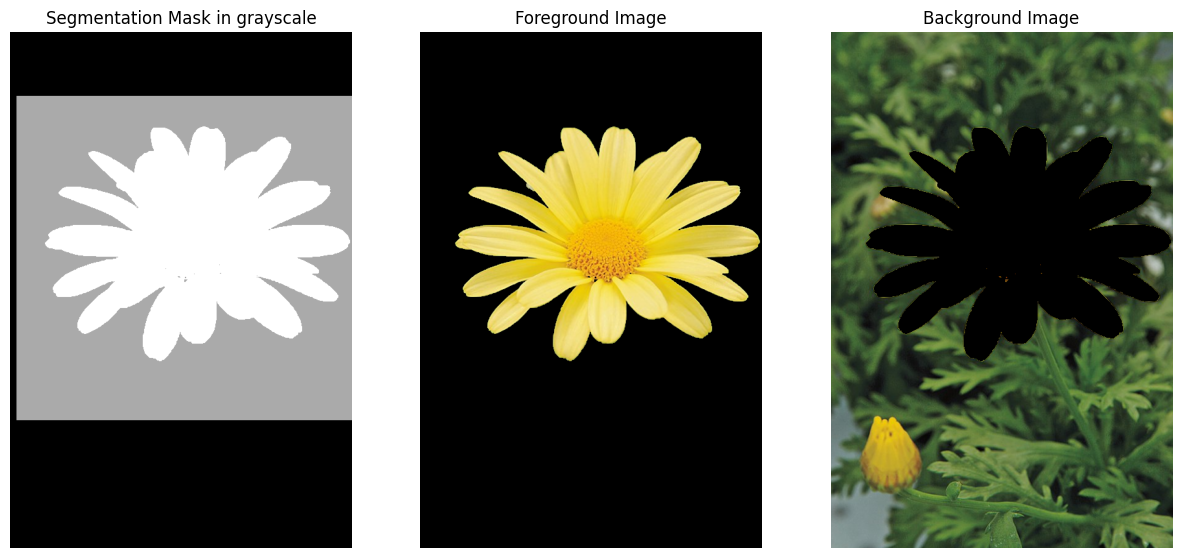

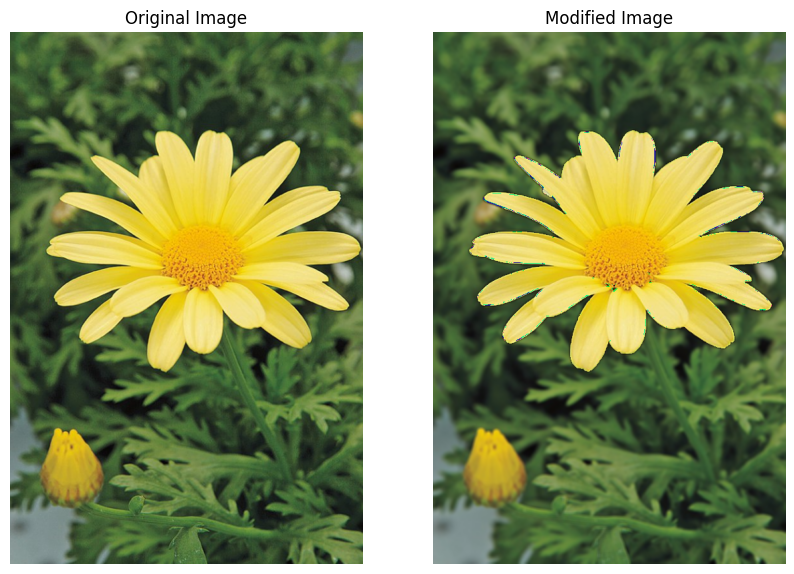

In [24]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('flower.png')
mask = np.zeros(img.shape[:2],dtype=np.uint8)

background_model = np.zeros((1,65),dtype=np.float64)  # thi is used by the algo
foreground_model = np.zeros((1,65),dtype=np.float64)    

rect = (10,100,520,500)

cv.grabCut(img,mask,rect,background_model,foreground_model,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')  # we are taaking sure backgroounds and potential
                                        #backgrounds

image_cut = img*mask2[:,:,np.newaxis]  # we are multiplying the mask with the image to get the cut image

fig,ax = plt.subplots(1,3,figsize=(15,12))

#plot segmentation mask
ax[0].imshow(mask,cmap='gray')
ax[0].set_title('Segmentation Mask in grayscale')
ax[0].axis('off')
#plot foreground image
ax[1].imshow(cv.cvtColor(image_cut, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Image')
ax[1].axis('off')
#plot background image
ax[2].imshow(cv.cvtColor(img-image_cut, cv.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
ax[2].axis('off')
plt.show()

background_img = img-image_cut
#apply gaussian blur to background image
sigma = 5
background_img_blur = cv.GaussianBlur(background_img,(5,5),sigma,sigma)
modified_image = image_cut + background_img_blur

fig,ax = plt.subplots(1,2,figsize=(10,8))
#plot original image
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
#plot modified image
ax[1].imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Modified Image')
ax[1].axis('off')

plt.show()


